In [1]:
pip install keras-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.0 MB/s 
     |████████████████████████████████| 604 kB 57.5 MB/s 
     |████████████████████████████████| 9.5 MB 42.3 MB/s 
     |████████████████████████████████| 965 kB 64.2 MB/s 
     |████████████████████████████████| 50 kB 7.5 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=84c685808190a32866cbd9c030533cd59d0458bae381d3d17b85e10e9b7af39e
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5
4/4 [==============================] - 2s 67ms/step


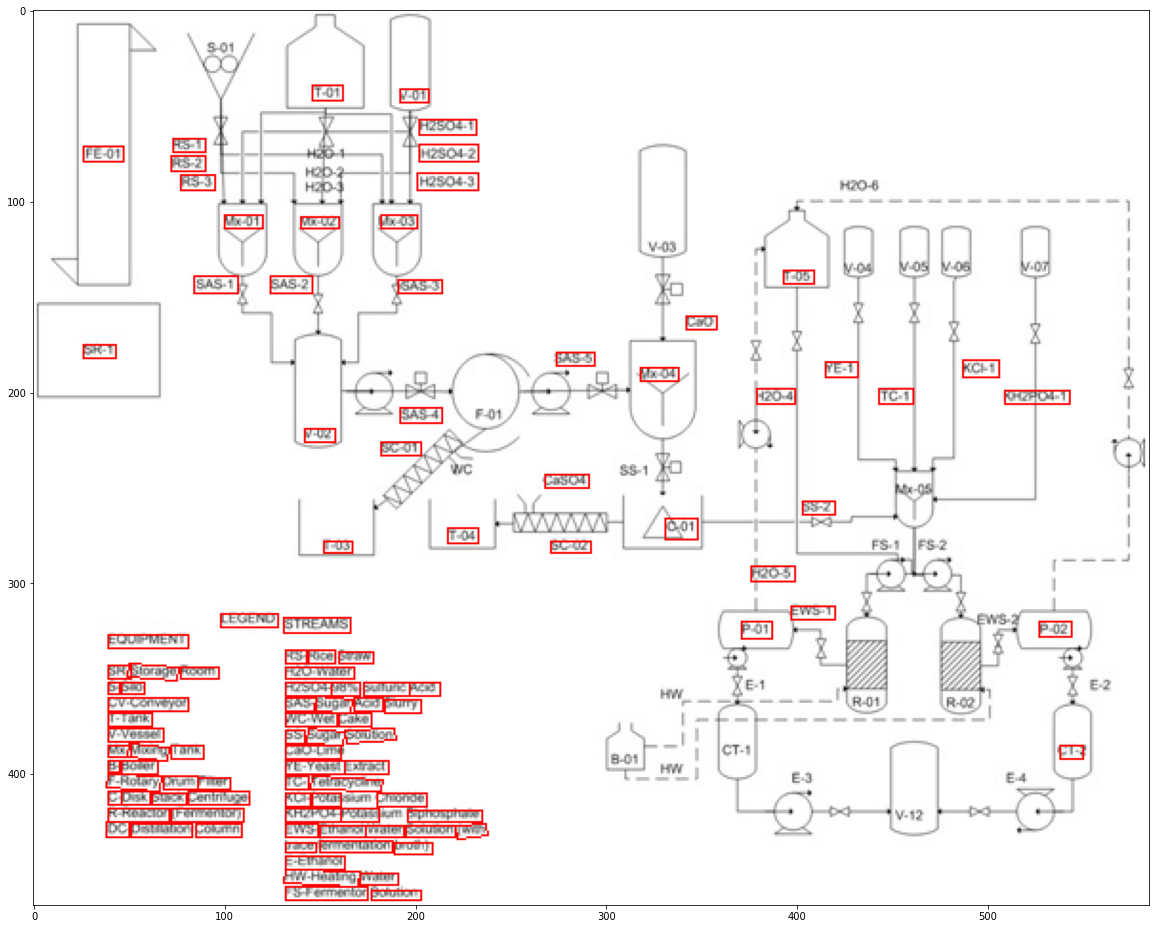

In [6]:
import keras_ocr
from keras_ocr import detection,recognition
import matplotlib.pyplot as plt
import pandas as pd

images = [keras_ocr.tools.read(img) for img in ["drawing.jpg"]]
pipeline = keras_ocr.pipeline.Pipeline()
results=pipeline.recognize(images)

df = pd.DataFrame(results[0],columns=["Text","Bounding_Boxes"])
Bounding_boxes = df["Bounding_Boxes"].values

plt.figure(figsize = (20,20))
plt.imshow(keras_ocr.tools.drawBoxes(plt.imread("drawing.jpg"),Bounding_boxes,thickness=1))

In [24]:
df

,Text,Bounding_Boxes
0,ton,"[[146.0, 39.0], [162.0, 39.0], [162.0, 47.0], ..."
1,joo,"[[192.0, 41.0], [207.0, 41.0], [207.0, 48.0], ..."
2,esoet,"[[202.0, 57.0], [232.0, 57.0], [232.0, 65.0], ..."
3,sl,"[[73.0, 67.0], [90.0, 67.0], [90.0, 74.0], [73..."
4,resotz,"[[202.0, 70.0], [233.0, 70.0], [233.0, 79.0], ..."
...,...,...
103,setnro,"[[132.0, 443.0], [163.0, 443.0], [163.0, 450.0..."
104,ntoolnd,"[[132.04678, 450.456], [171.19266, 451.6422], ..."
105,woo,"[[171.0, 452.0], [191.0, 452.0], [191.0, 458.0..."
106,secmtlo,"[[132.0, 459.0], [175.0, 459.0], [175.0, 466.0..."


In [9]:
import cv2
from PIL import Image
import numpy as np

img = cv2.imread("drawing.jpg")

In [10]:
sharpening_filter = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

In [11]:
sharpened_image= cv2.filter2D(img,-1,sharpening_filter)

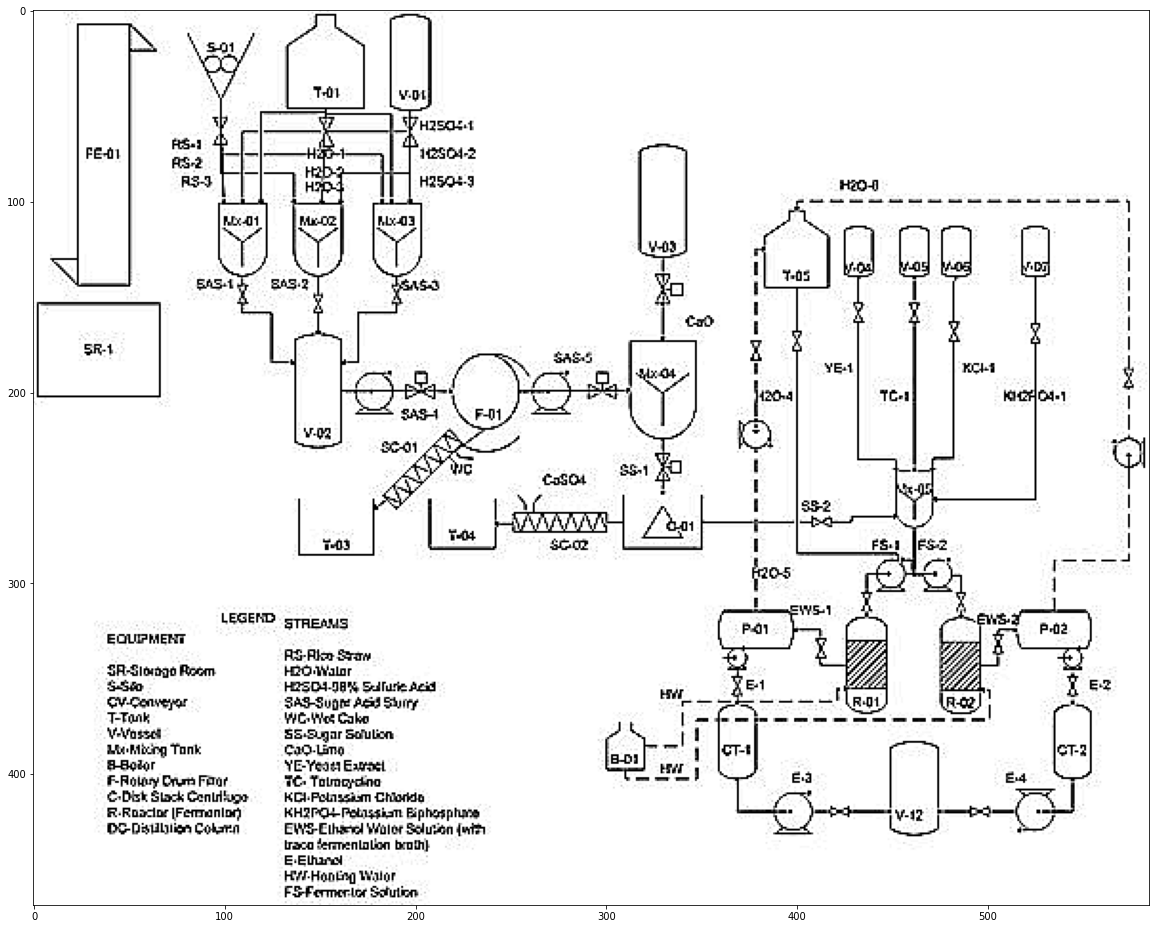

In [12]:
plt.figure(figsize = (20,20))
plt.imshow(sharpened_image)

4/4 [==============================] - 0s 53ms/step


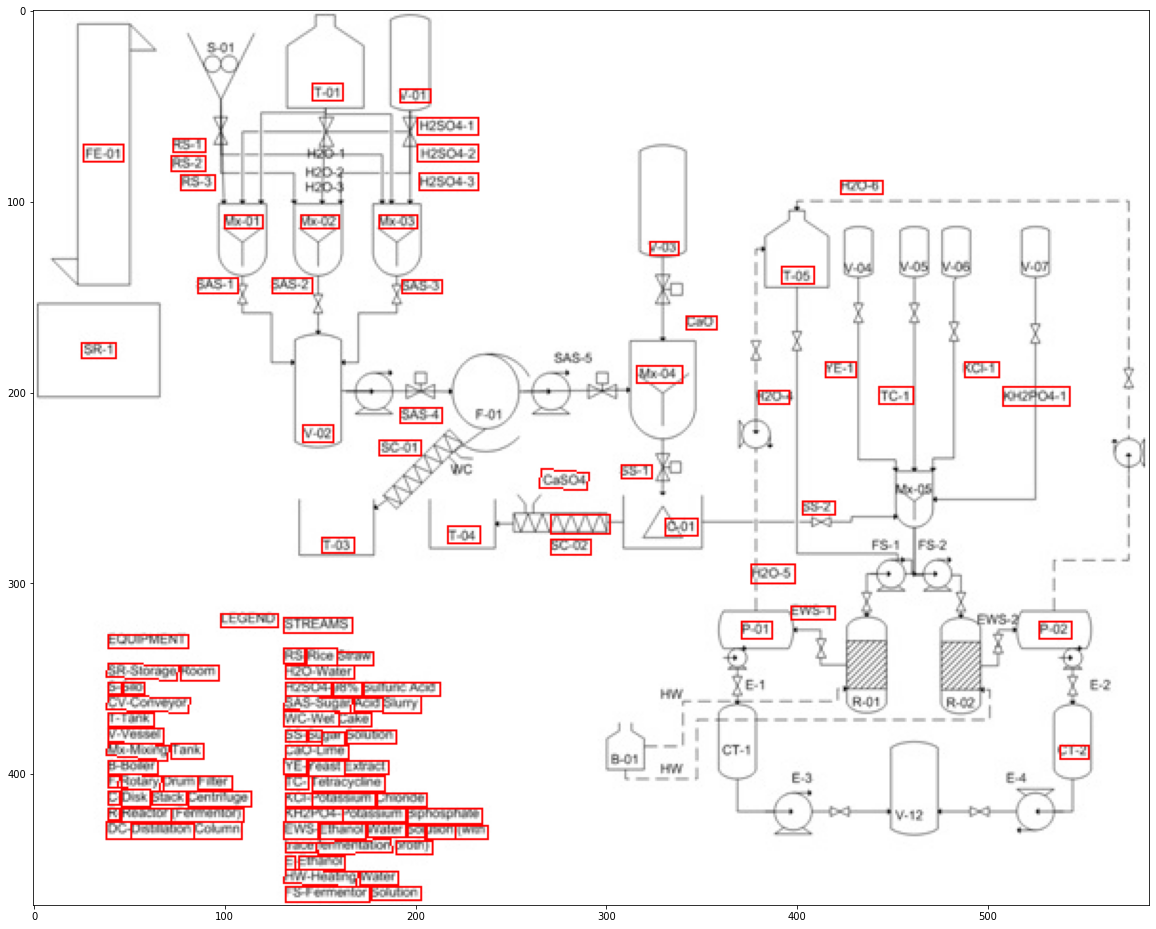

In [15]:
results1=pipeline.recognize([sharpened_image])
df1 = pd.DataFrame(results1[0],columns=["Text","Bounding_Boxes"])

plt.figure(figsize = (20,20))
plt.imshow(keras_ocr.tools.drawBoxes(img,Bounding_boxes1,thickness=1))

In [16]:
from google.colab import files
files.upload()

Saving EDSR_x4.pb to EDSR_x4.pb


In [17]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()
 
path = "EDSR_x4.pb"
 
sr.readModel(path)
 
sr.setModel("edsr",4)
 

In [18]:
result = sr.upsample(img)

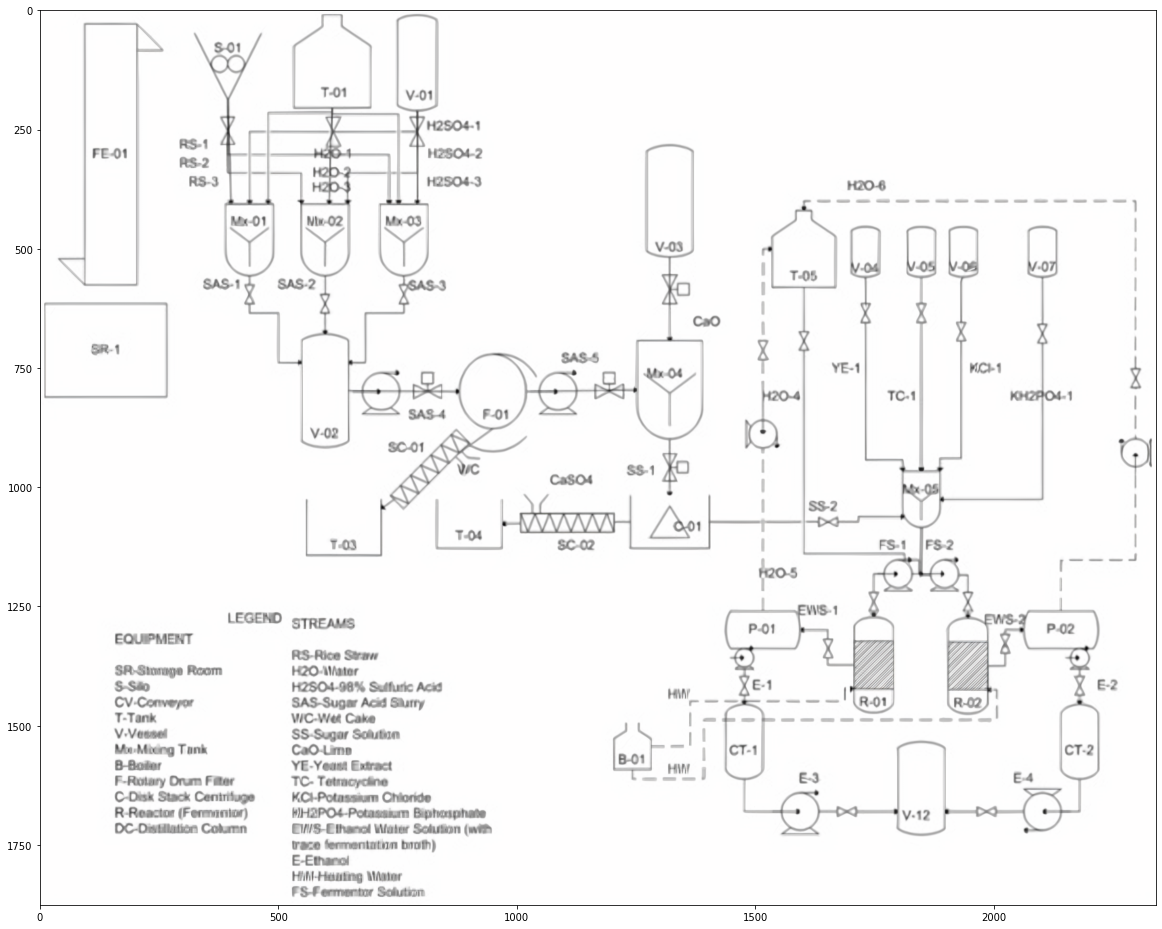

In [19]:
plt.figure(figsize = (20,20))
plt.imshow(result)

4/4 [==============================] - 3s 889ms/step


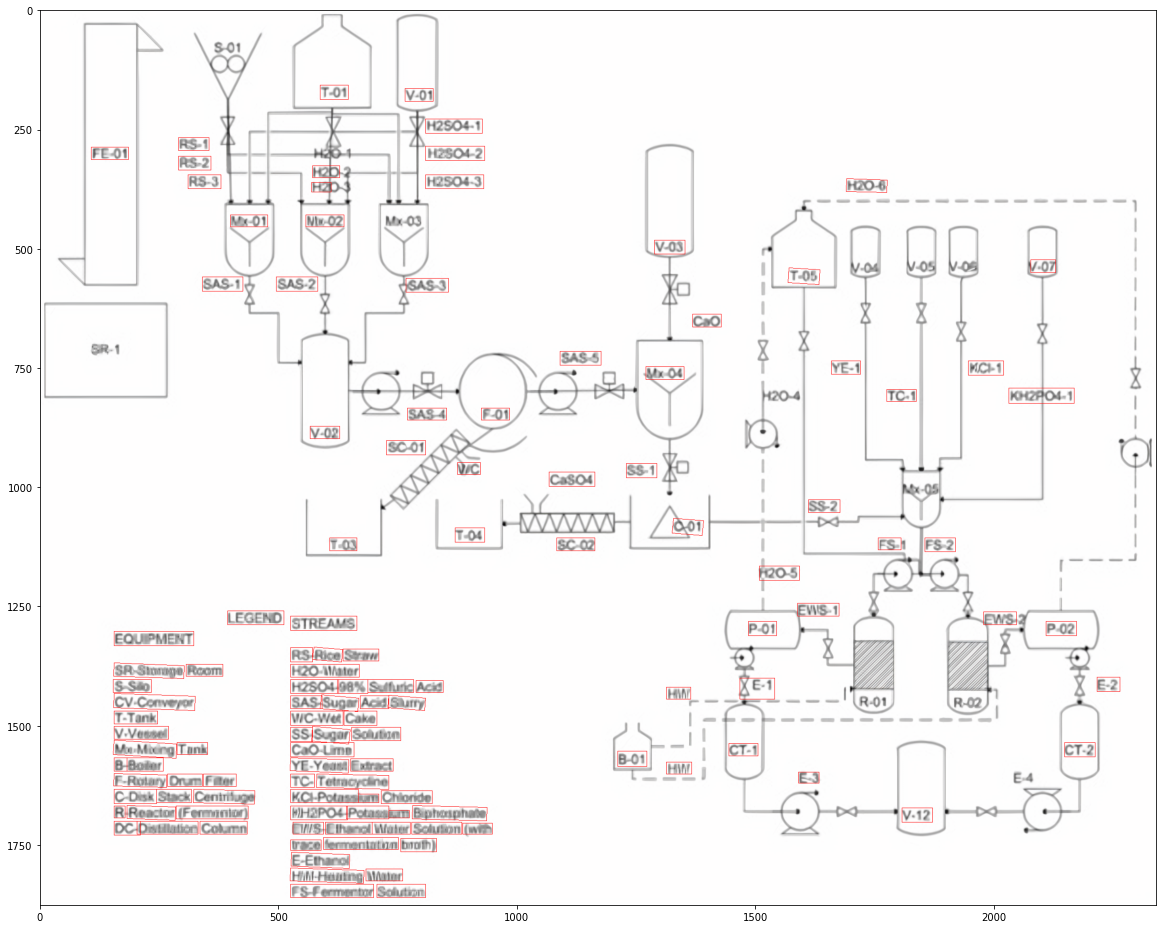

In [20]:
results1=pipeline.recognize([result])
df1 = pd.DataFrame(results1[0],columns=["Text","Bounding_Boxes"])
Bounding_boxes1 = df1["Bounding_Boxes"].values
plt.figure(figsize = (20,20))
plt.imshow(keras_ocr.tools.drawBoxes(result,Bounding_boxes1,thickness=1))

In [21]:
result_image = result.copy()
mask = np.ones(result_image.shape, dtype=np.uint8) * 255
gray = cv2.cvtColor(result_image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,1))
dilate = cv2.dilate(thresh, kernel, iterations=3)

cnts = cv2.findContours(dilate, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    if area < 5000:
        x,y,w,h = cv2.boundingRect(c)
        mask[y:y+h, x:x+w] = result_image[y:y+h, x:x+w]

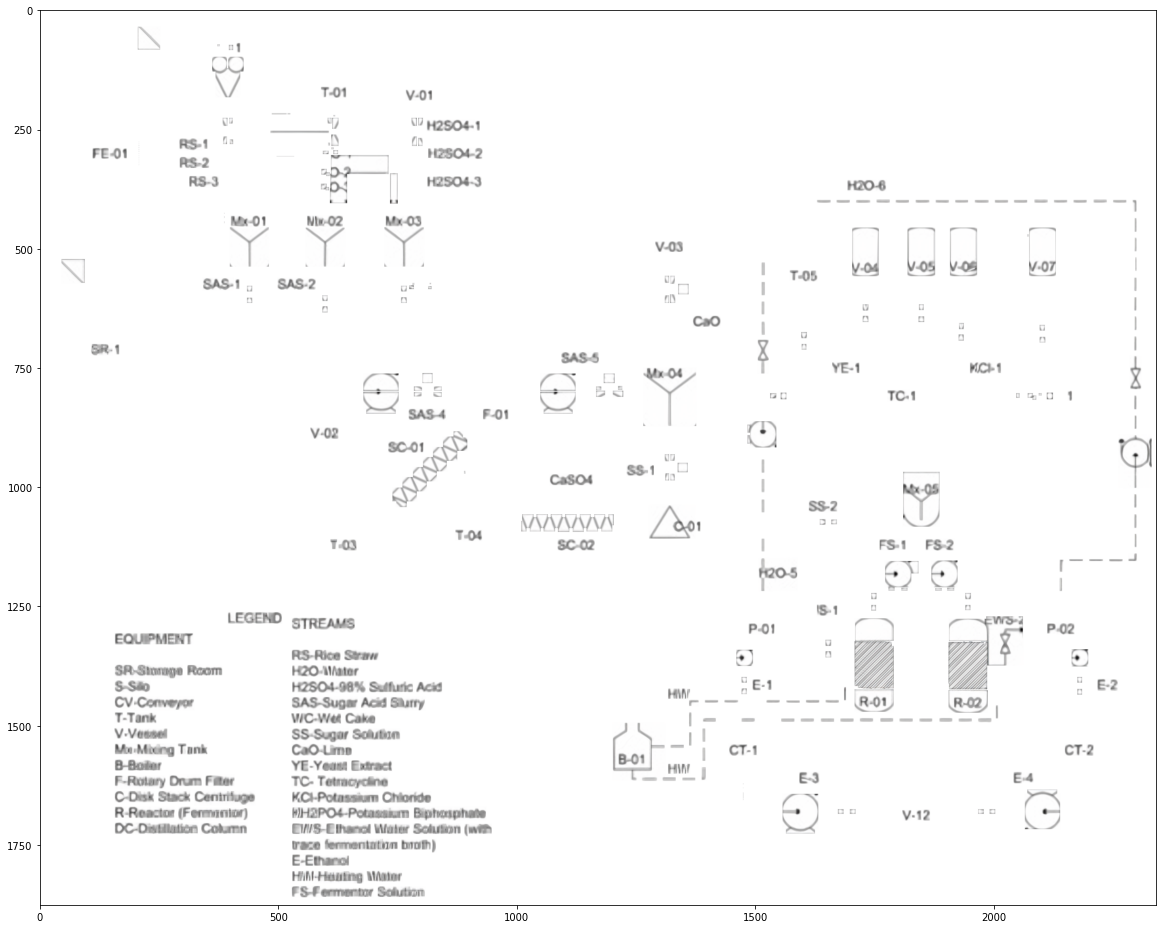

In [22]:
plt.figure(figsize = (20,20))
plt.imshow(mask)

5/5 [==============================] - 1s 152ms/step


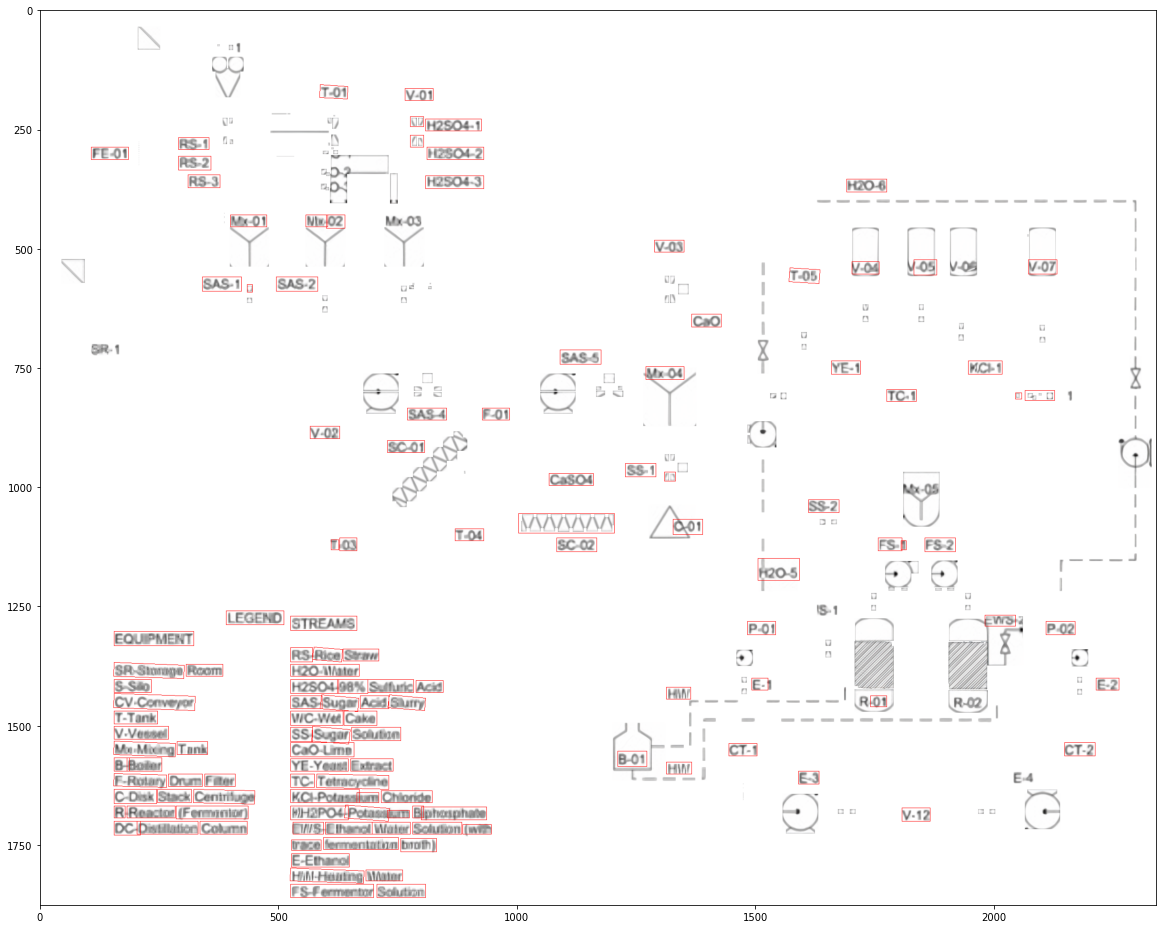

In [23]:
results1=pipeline.recognize([mask])
df1 = pd.DataFrame(results1[0],columns=["Text","Bounding_Boxes"])
Bounding_boxes1 = df1["Bounding_Boxes"].values
plt.figure(figsize = (20,20))
plt.imshow(keras_ocr.tools.drawBoxes(mask,Bounding_boxes1,thickness=1))